In [ ]:
!pip install kaggle

In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#api to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset


 98% 160M/163M [00:04<00:00, 43.0MB/s]
100% 163M/163M [00:04<00:00, 38.0MB/s]


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow #creates a new window and displayes the images in it
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3052.jpg', 'with_mask_2968.jpg', 'with_mask_1095.jpg', 'with_mask_1056.jpg', 'with_mask_1693.jpg']
['with_mask_3595.jpg', 'with_mask_3283.jpg', 'with_mask_925.jpg', 'with_mask_2616.jpg', 'with_mask_1861.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1260.jpg', 'without_mask_3812.jpg', 'without_mask_820.jpg', 'without_mask_3720.jpg', 'without_mask_1739.jpg']
['without_mask_74.jpg', 'without_mask_2562.jpg', 'without_mask_1782.jpg', 'without_mask_3581.jpg', 'without_mask_741.jpg']


In [ ]:
#count no of with mask images and without mask images
print('No. of with mask images',len(with_mask_files))
print('No. of without mask images',len(without_mask_files))

No. of with mask images 3725
No. of without mask images 3828


In [ ]:
#Creating labels for the two classes of integers

with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels= with_mask_labels + without_mask_labels
print(len(labels))

7553


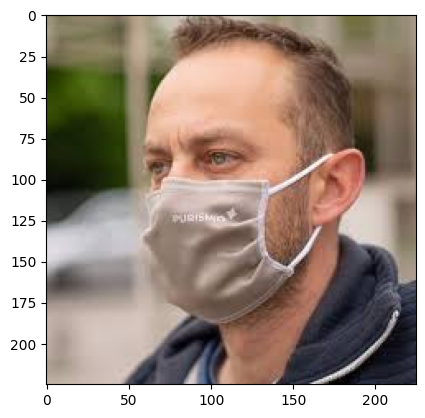

In [ ]:
#Displaying the with mask images
img=mpimg.imread('/content/data/with_mask/with_mask_2968.jpg')#reading the images in the form of numpy array
imgplot=plt.imshow(img)
plt.show()

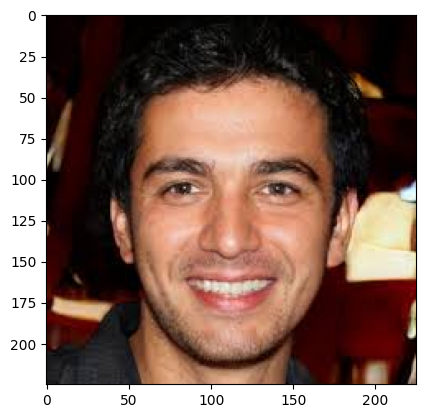

In [ ]:
#Displaying the without mask images
img=mpimg.imread('/content/data/without_mask/without_mask_2562.jpg')#reading the images in the form of numpy array
imgplot=plt.imshow(img)
plt.show()

In [ ]:
#Image processing
#1.resize the images
#2.convert the images to numpy arrays

#convert the images to numpy arrays
with_mask_path='/content/data/with_mask/'
data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file) #image is being read using the PIL library
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'


for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file) #image is being read using the PIL library
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[196, 199, 192],
        [198, 201, 194],
        [199, 202, 195],
        ...,
        [185, 188, 193],
        [185, 188, 193],
        [185, 188, 193]],

       [[203, 204, 196],
        [203, 205, 196],
        [203, 205, 197],
        ...,
        [185, 188, 193],
        [185, 188, 193],
        [185, 188, 193]],

       [[184, 182, 172],
        [188, 186, 176],
        [194, 193, 183],
        ...,
        [185, 188, 193],
        [185, 188, 193],
        [186, 189, 194]],

       ...,

       [[163, 162, 158],
        [162, 161, 157],
        [160, 159, 155],
        ...,
        [178, 177, 173],
        [182, 181, 177],
        [181, 180, 176]],

       [[163, 162, 158],
        [161, 160, 156],
        [159, 158, 154],
        ...,
        [182, 181, 177],
        [176, 175, 171],
        [176, 175, 171]],

       [[163, 162, 158],
        [162, 161, 157],
        [160, 159, 155],
        ...,
        [183, 182, 178],
        [181, 180, 176],
        [177, 176, 171]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape #we got the list which contains elements in the form of numpy arrays

(128, 128, 3)

In [ ]:
#converting image list and label list to numpy arrays
X=np.array(data)
y=np.array(labels)


numpy.ndarray

In [ ]:
print(X.shape) #128-height 128-width 3-means we are dealing with rgb values
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(X)

[[[[196 199 192]
   [198 201 194]
   [199 202 195]
   ...
   [185 188 193]
   [185 188 193]
   [185 188 193]]

  [[203 204 196]
   [203 205 196]
   [203 205 197]
   ...
   [185 188 193]
   [185 188 193]
   [185 188 193]]

  [[184 182 172]
   [188 186 176]
   [194 193 183]
   ...
   [185 188 193]
   [185 188 193]
   [186 189 194]]

  ...

  [[163 162 158]
   [162 161 157]
   [160 159 155]
   ...
   [178 177 173]
   [182 181 177]
   [181 180 176]]

  [[163 162 158]
   [161 160 156]
   [159 158 154]
   ...
   [182 181 177]
   [176 175 171]
   [176 175 171]]

  [[163 162 158]
   [162 161 157]
   [160 159 155]
   ...
   [183 182 178]
   [181 180 176]
   [177 176 171]]]


 [[[144 136 113]
   [143 136 110]
   [137 130 104]
   ...
   [156 143 126]
   [163 150 133]
   [167 153 136]]

  [[154 146 123]
   [153 146 120]
   [147 140 114]
   ...
   [156 143 126]
   [163 150 133]
   [167 153 136]]

  [[156 148 125]
   [155 148 123]
   [149 142 116]
   ...
   [156 143 126]
   [162 150 133]
   [168 153

In [ ]:
#train-test-split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train_scaled[56]

array([[[0.34509804, 0.2627451 , 0.21176471],
        [0.38431373, 0.29019608, 0.24313725],
        [0.40392157, 0.30196078, 0.25490196],
        ...,
        [0.3254902 , 0.2       , 0.21176471],
        [0.29411765, 0.17647059, 0.19215686],
        [0.26666667, 0.16078431, 0.18039216]],

       [[0.38039216, 0.29019608, 0.23529412],
        [0.41176471, 0.31764706, 0.2627451 ],
        [0.42352941, 0.31764706, 0.27058824],
        ...,
        [0.29019608, 0.16078431, 0.16078431],
        [0.26666667, 0.14509804, 0.14509804],
        [0.24313725, 0.12941176, 0.1372549 ]],

       [[0.39215686, 0.29019608, 0.22352941],
        [0.42745098, 0.32156863, 0.25882353],
        [0.44705882, 0.3372549 , 0.2745098 ],
        ...,
        [0.37254902, 0.23529412, 0.21568627],
        [0.38039216, 0.25098039, 0.23137255],
        [0.38039216, 0.25882353, 0.24705882]],

       ...,

       [[0.55686275, 0.49803922, 0.4627451 ],
        [0.54901961, 0.48627451, 0.45098039],
        [0.52156863, 0

In [ ]:
#Building CNN
import tensorflow as tf
from tensorflow import keras

no_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))#convolutional layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))#max pooling layer

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))#convolutional layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(no_of_classes,activation='sigmoid'))


In [ ]:
#compiling the NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#training the NN
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=50)

Epoch 1/50
170/170 [==============================] - 4s 21ms/step - loss: 0.1363 - acc: 0.9483 - val_loss: 0.2610 - val_acc: 0.9207
Epoch 2/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1056 - acc: 0.9616 - val_loss: 0.2537 - val_acc: 0.9289
Epoch 3/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1009 - acc: 0.9641 - val_loss: 0.2009 - val_acc: 0.9223
Epoch 4/50
170/170 [==============================] - 3s 20ms/step - loss: 0.0772 - acc: 0.9724 - val_loss: 0.2669 - val_acc: 0.9207
Epoch 5/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0779 - acc: 0.9715 - val_loss: 0.2394 - val_acc: 0.9256
Epoch 6/50
170/170 [==============================] - 3s 18ms/step - loss: 0.0758 - acc: 0.9730 - val_loss: 0.2222 - val_acc: 0.9273
Epoch 7/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0588 - acc: 0.9792 - val_loss: 0.2120 - val_acc: 0.9339
Epoch 8/50
170/170 [==============================] - 3s 19ms/step - 

In [ ]:
#model evaluation
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print('Test Accuracy=',accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.4192 - acc: 0.9232
Test Accuracy= 0.9232296347618103


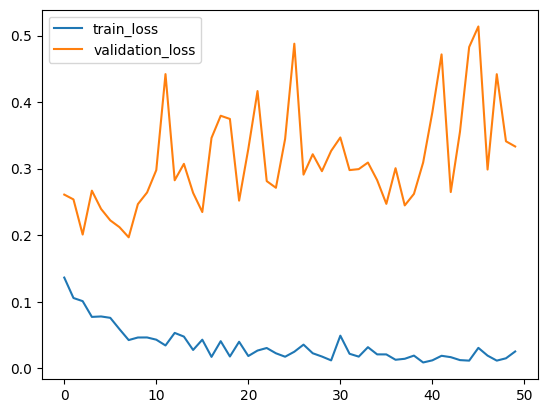

In [ ]:
h=history
#plot the loss values
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

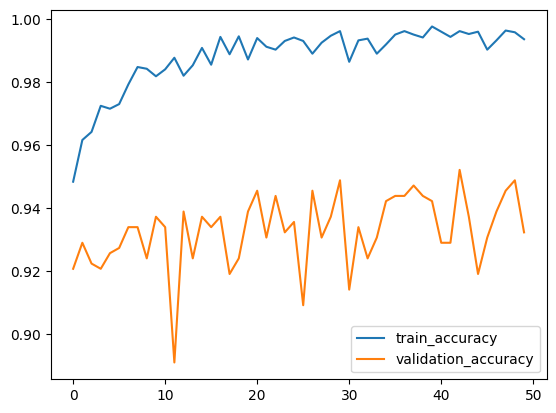

In [ ]:
#plot the accuracy values
plt.plot(h.history['acc'],label='train_accuracy')
plt.plot(h.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/papa.jpeg


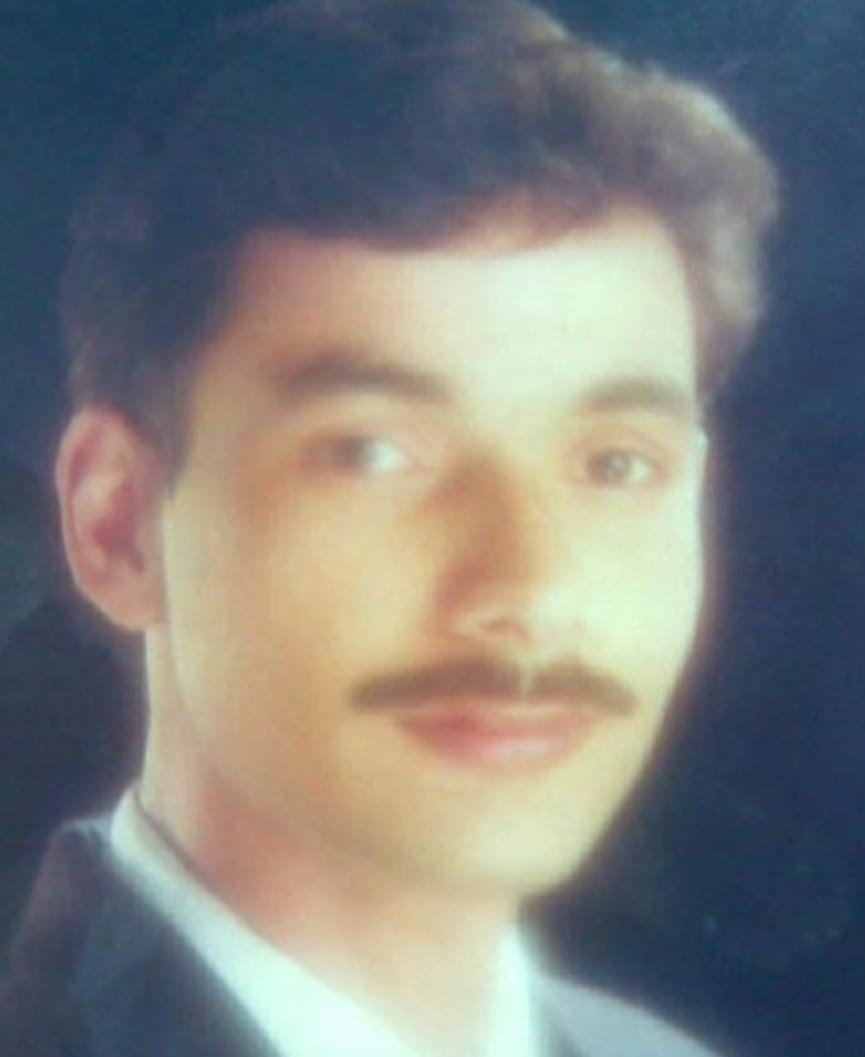

1/1 [==============================] - 0s 27ms/step
[[0.12192515 0.89710855]]
1
The person in the image is not wearing the mask


In [ ]:
#predictive system

input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print("The person in the image is not wearing the mask")
else:
  print("The person in the image is wearing the mask")